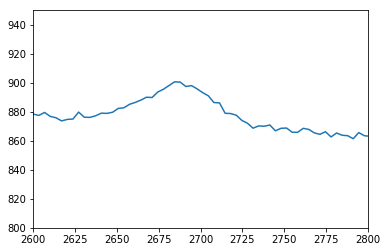

In [97]:
# import one set of data

import pylab as py

# open files
f_x1 = open('C:\\Users\\abarrett.BNL\\Data\\2017.07.20\\Gr_Cu\\01 Single Spectrum_000_Spec.Data 1 (X-Axis).txt','r')
f_y1 = open('C:\\Users\\abarrett.BNL\\Data\\2017.07.20\\Gr_Cu\\01 Single Spectrum_000_Spec.Data 1 (Y-Axis).txt','r')

# import data
x1 = []
y1 = [] 

for line in f_x1 :
	x1.append(float(line))

for line in f_y1 : 
	y1.append(float(line))

py.plot(x1,y1)
py.xlim(2600, 2800)
py.ylim(800, 950)
py.show()

f_x1.close()
f_y1.close()

C:\Users\abarrett.BNL\Data\2017.07.20\Cu\1 Single Spectrum_012_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\1 Single Spectrum_012_Spec.Data 1 (Y-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\2 Single Spectrum_013_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\2 Single Spectrum_013_Spec.Data 1 (Y-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\3 Single Spectrum_014_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\3 Single Spectrum_014_Spec.Data 1 (Y-Axis).txt


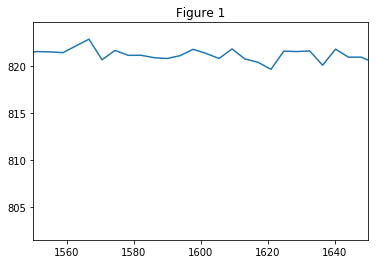

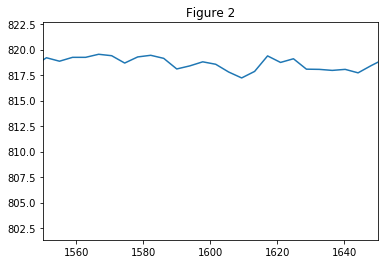

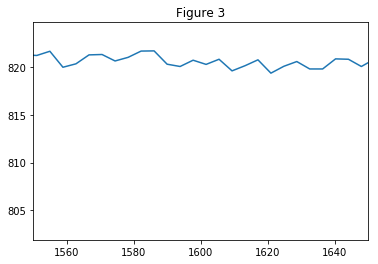

In [35]:
# import data for batch processing

import pylab as py
import os
import numpy as np
import matplotlib.pyplot as plt

# print specification
np.set_printoptions(threshold = np.nan)

# folder containing only the data to be imported
path = 'C:\\Users\\abarrett.BNL\\Data\\2017.07.20\\Cu'

# import data from each file
data = np.array([])
for filename in os.listdir(path):
    fpath = path + '\\' + filename
    print(fpath)
    f = open(fpath,'r')
    x = []
    for line in f:
        x.append(float(line))    
    data = np.append(data, x)
    f.close()

# reshape into matrix, each file has its own row
# ORDERING ISSUE HERE
num_files = len(os.listdir(path))
data = data.reshape(num_files, len(data) // num_files)

# iteratively plot data 
idx = data.shape[0] // 2
for i in range(idx):
    plt.figure(i)
    py.title('Figure ' + str(i+1))
    py.plot(data[2*i],data[2*i + 1])
    py.xlim(1550,1650)
    py.show()

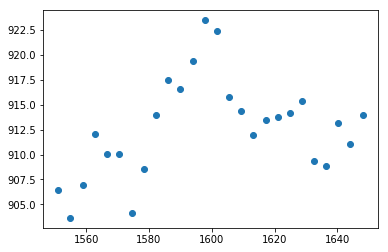

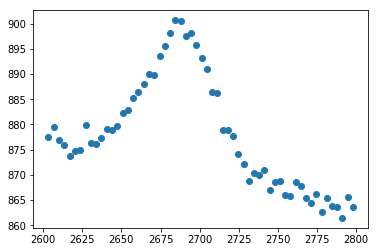

In [92]:
# automatically select the appropriate ranges in the data (one measurment)

import numpy as np

# set cutoffs for each peak
start_G = 1550
end_G = 1650
start_2D = 2600
end_2D = 2800

# convert to numpy arrays
x1_np = np.array(x1)
y1_np = np.array(y1)

# select G peak
x1_G = x1_np[(np.argmax(x1_np>start_G)):(np.argmax(x1_np>end_G))]
y1_G = y1_np[(np.argmax(x1_np>start_G)):(np.argmax(x1_np>end_G))]

# select 2D peak
x1_2D = x1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]
y1_2D = y1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]

plt.figure(1)
py.scatter(x1_G,y1_G)

plt.figure(2)
py.scatter(x1_2D,y1_2D)


In [10]:
# automatically select peak ranges (batch processing)

import numpy as np

# set cutoffs for each peak
start_G = 1550
end_G = 1650
start_2D = 2600
end_2D = 2800

# select peaks
data_G = np.array([])
data_2D = np.array([])
idx = data.shape[0] // 2
for i in range(data.shape[0]):
    if i < idx:
        row = data[i]
        row2 = row[(np.argmax(row>start_G)):(np.argmax(row>end_G))]
        data_G = np.append(data_G, row2)
        row3 = row[(np.argmax(row>start_2D)):(np.argmax(row>end_2D))]
        data_2D = np.append(data_2D, row3)
    else:    
        row = data[i - idx]
        row2 = data[i]
        row3 = row2[(np.argmax(row>start_G)):(np.argmax(row>end_G))]
        data_G = np.append(data_G, row3)
        row4 = row2[(np.argmax(row>start_2D)):(np.argmax(row>end_2D))]
        data_2D = np.append(data_2D, row4)
# each measurement is a row
data_G = data_G.reshape(idx*2, len(data_G) // (idx*2)) 
data_2D = data_2D.reshape(idx*2, len(data_2D) // (idx*2)) 

# iteratively plot data  
for i in range(idx):
    plt.figure(i)
    py.title('G Peak ' + str(i+1))
    py.scatter(data_G[i],data_G[i+idx])
    py.show()
for i in range(idx):
    plt.figure(i+idx)
    py.title('2D Peak ' + str(i+1))
    py.scatter(data_2D[i], data_2D[i+idx])
    py.show()
    


ValueError: cannot reshape array of size 104 into shape (6,17)

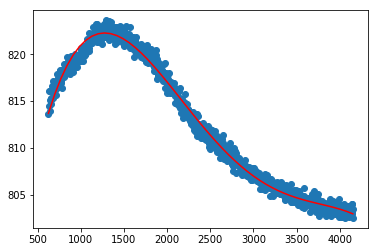

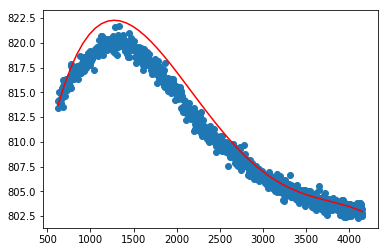

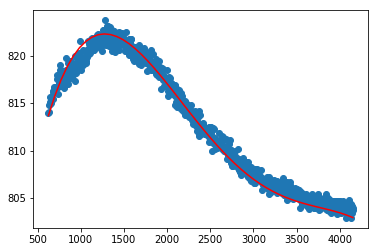

In [40]:
# copper polynomial curve fitting

from scipy.optimize import curve_fit

# degree of polynomial fit
degree = 4

# data to be fit
x = data[0,:]
y = data[1,:]

# def fit_func(x, a, b, c):
#     return a*(x**2) + b*x + c
# params = curve_fit(fit_func, x1, y1)
# [a, b, c] = params[0]

# calculate polynomial
z = np.polyfit(x, y, degree)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

idx = data.shape[0] // 2
for i in range(idx):
    plt.figure(i+1)
    py.scatter(data[2*i],data[2*i + 1])
    py.plot(x_new,y_new,'-r')
    py.show()

In [166]:
# take heatmap text files and convert to csv

import csv
import tempfile

# text file to convert, file path for csv to create
path = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um'
filename = '4 Scan_000_Spec.Data 1_F Width 7 (Pos 2700.0 rel. 1cm)'
txt_file = path + '\\' + filename + '.txt'
csv_file = path + '\\' + filename + '.csv'

# create temp text file with header removed
temp = path + '\\' + 'temp.txt'
f = open(temp, 'w')
f.close()
with open(txt_file, 'r') as fin:
    data = fin.read().splitlines(True)
with open(temp, 'w') as fout:
    fout.writelines(data[14:])

# write to csv    
in_txt = csv.reader(open(temp), delimiter = '\t')
output = csv.writer(open(csv_file, 'w'))
output.writerows(in_txt)

f = open(csv_file, 'r')
f.close()


In [ ]:
# Raman heatmap
# need to have data in .csv file 

import seaborn as sns

pathG = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um\\csv3.csv'
path2D = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um\\hmap2_csv.csv'

height_G = np.loadtxt(open(pathG, "rb"), delimiter=",", skiprows=1)
# height_2D = np.loadtxt(open(path2D, "rb"), delimiter=",", skiprows=1)
# ratio = height_2D / height_G

plt.figure(1)
plt.imshow(height_G, cmap='hot', interpolation='nearest')
plt.title('G Peak')
plt.colorbar()
plt.show()

# plt.figure(2)
# plt.imshow(height_2D, cmap='hot', interpolation='nearest')
# plt.title('2D Peak')
# plt.colorbar()
# plt.show()

# plt.figure(3)
# plt.imshow(ratio, cmap='hot', interpolation='nearest')
# plt.title('2D / G Ratio')
# plt.colorbar()
# plt.show()

# for line in g2:
#     print(line)

# plt.figure(4)
# sns.heatmap(height_2D, linewidth=0.5)
# plt.show()


In [48]:
# load image scan data (takes at least 2 min 40 sec)

path = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\88um\\'
yfile = path + '1 Scan_003_Spec.Data 1_F (Y-Axis).txt'
xfile = path + '1 Scan_003_Spec.Data 1_F (X-Axis).txt'

import numpy as np

# parameters
pxl_count = 150 ** 2

# load data
x = np.loadtxt(xfile)
y_temp = np.loadtxt(yfile)

# y is a list of length pxl_count, each element of the list is a numpy array
# of the spectrum of one pixel
y = np.split(y_temp, pxl_count)


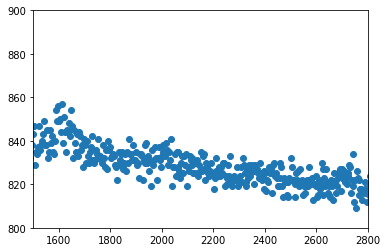

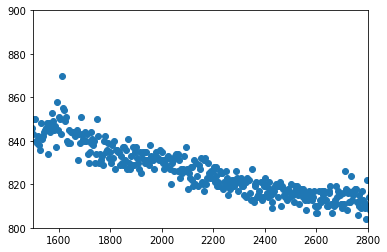

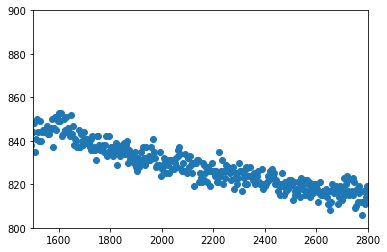

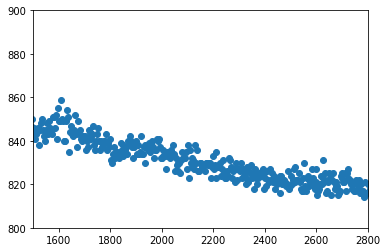

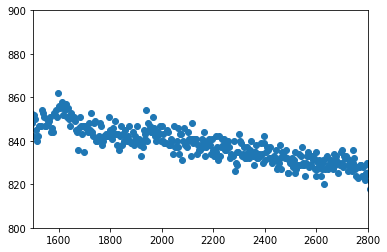

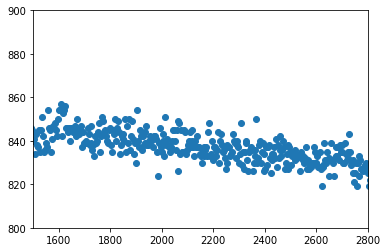

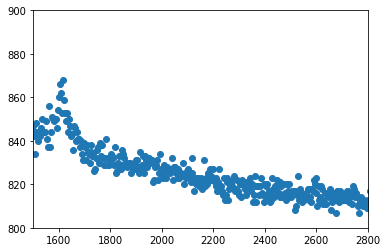

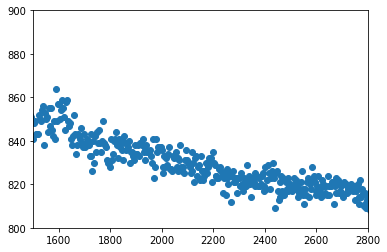

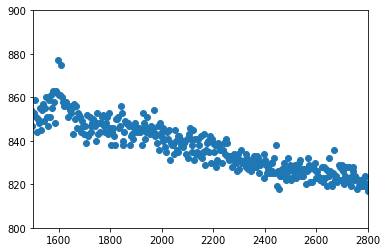

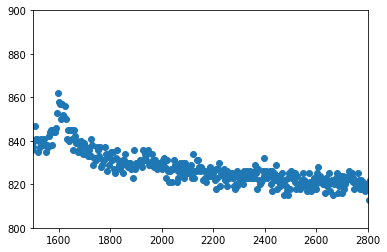

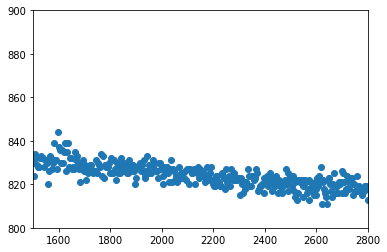

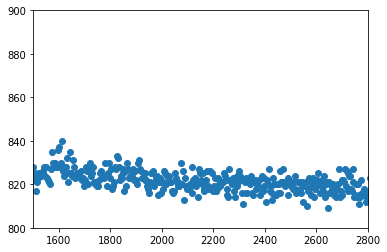

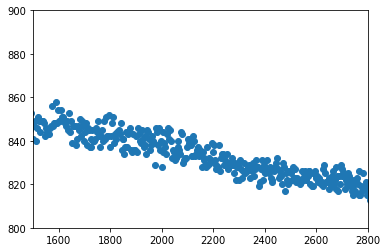

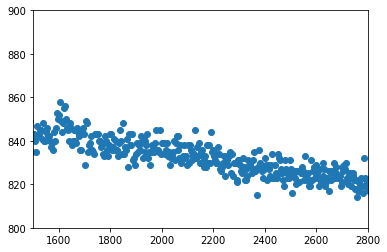

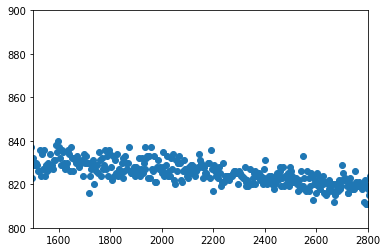

In [59]:
import pylab as py

for i in range(15):
    plt.figure(i)    
    py.scatter(x, y[i * 1024 - 1])
    py.xlim(1500, 2800)
    py.ylim(800, 900)
    py.show()

(820, 880)

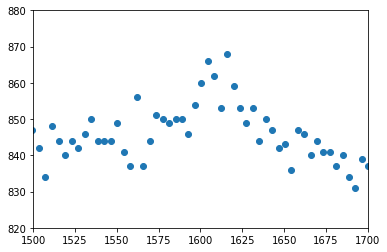

In [67]:
py.scatter(x, y[6 * 1024 - 1])
py.xlim(1500, 1700)
py.ylim(820, 880)

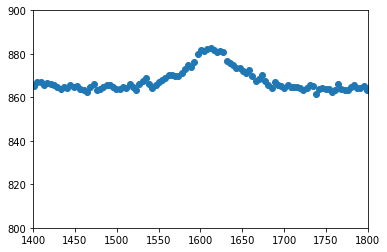

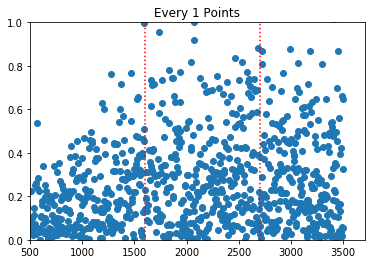

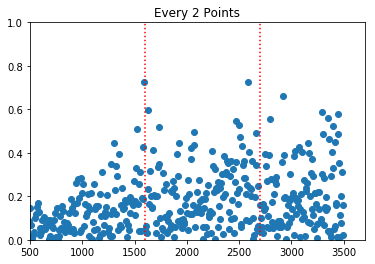

In [188]:
# background subtraction - point-wise slope method


# number plots to make
gaps = []
for i in range(2):
    gaps.append(i + 1)

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (Y-Axis).txt','r')

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (Y-Axis).txt','r')

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (Y-Axis).txt','r')

xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\3 ACS_6-8_layer_Gr_Cu_spec3 (X-Axis).txt','r')
yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\3 ACS_6-8_layer_Gr_Cu_spec3 (Y-Axis).txt','r')


x = np.loadtxt(xfile)
y = np.loadtxt(yfile)

x_len = len(x)

plt.figure(0)
py.scatter(x,y)
py.xlim(1400, 1800)
py.ylim(800, 900)
py.show

for gap in gaps:
    slopes = []
    x2 = []
    for i in range(x_len // gap - 1):
        slope = abs((y[gap*i + gap] - y[gap*i]) / (x[gap*i + gap] - x[gap*i]))
        slopes.append(slope)
        x2.append(x[gap*i])
    #     print(gap*i + gap)

    plt.figure(gap)
    plt.axvline(x=1600, linestyle=':', color='r')
    plt.axvline(x=2700, linestyle=':', color='r')
    py.title('Every ' + str(gap) + ' Points')
    py.scatter(x2, slopes)
    py.xlim(500)
    py.ylim(0, 1)
    py.show

    








C:\Users\abarrett.BNL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: RankWarning: Polyfit may be poorly conditioned


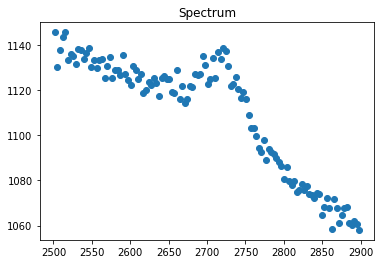

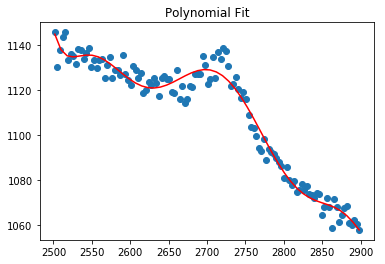

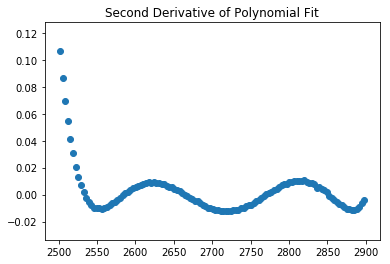

C:\Users\abarrett.BNL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:95: RankWarning: Polyfit may be poorly conditioned


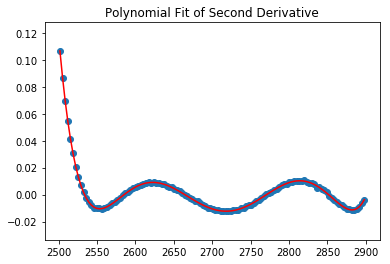

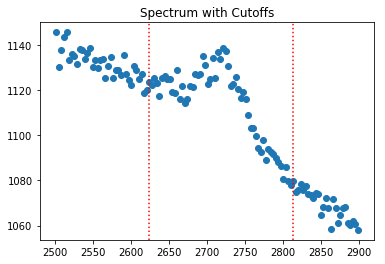

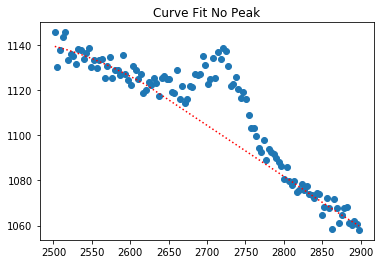

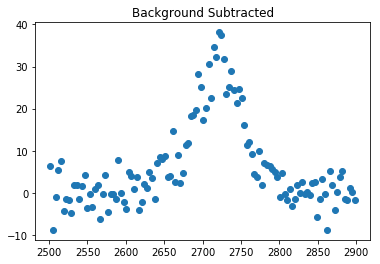

In [350]:
# BACKGROUND SUBTRACTION (One peak only)
# Fits a polynomial over the peak between start_range and end_range. Uses the local maxima of the second 
# derivative of that polynomial to determine the cutoff points for the peak itself. Fits a polynomial to 
# the data that excludes the peak, and subtracts that background polynomial from the spectrum data to 
# give final peak


# SELECT APPROPRIATE DATA RANGE

# set cutoffs for each peak
# range : range over which to fit polynomial
start_G_range = 1400
end_G_range = 1800
# peak : minimum possible wavenumber for start of peak itself
# use this to eliminate edge effects of derivatives
start_G_peak = 1500

# start_2D = 2600
# end_2D = 2800


# LOAD SPECTRUM

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (Y-Axis).txt','r')

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (Y-Axis).txt','r')

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (Y-Axis).txt','r')

xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\1 ACS_6-8_layer_Gr_Cu_spec1 (X-Axis).txt','r')
yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\1 ACS_6-8_layer_Gr_Cu_spec1 (Y-Axis).txt','r')

x = np.loadtxt(xfile)
y = np.loadtxt(yfile)

# convert to numpy arrays
x_np = np.array(x)
y_np = np.array(y)

# select G peak
x_G = x_np[(np.argmax(x_np>start_G_range)):(np.argmax(x_np>end_G_range))]
y_G = y_np[(np.argmax(x_np>start_G_range)):(np.argmax(x_np>end_G_range))]

# # select 2D peak
# x1_2D = x1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]
# y1_2D = y1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]

plt.figure(0)
py.title('Spectrum')
py.scatter(x_G,y_G)



# POLYNOMIAL FIT TO SPECTRUM

# degree of polynomial fit
degree = 10

# calculate polynomial
z = np.polyfit(x_G, y_G, degree)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x_G[0], x_G[-1], 50)
y_new = f(x_new)

plt.figure(1)
py.title('Polynomial Fit')
py.scatter(x_G,y_G)
py.plot(x_new,y_new,'-r')
py.show()

# derivatives
import scipy.misc as sm
derivs2 = []
for i in x_G:
    derivs2.append((sm.derivative(f, i, n=2)))

plt.figure(3)
py.title('Second Derivative of Polynomial Fit')
py.scatter(x_G, derivs2)
py.show()


# FIND LOCAL MAXIMA OF SECOND DERIVATIVE
# fits a polynomial to 2nd derivative, finds maxima of that

# degree of polynomial fit
degree = 10

# calculate polynomial
z = np.polyfit(x_G, derivs2, degree)
f2 = np.poly1d(z)

# calculate new x's and y's
y2 = f2(x_G)

plt.figure(4)
py.title('Polynomial Fit of Second Derivative')
py.scatter(x_G,derivs2)
py.plot(x_G, y2,'-r')
py.show()

# find max 
from scipy.signal import argrelextrema

idx = np.argmax(x_G>start_G_peak)
x_Gpeak = x_G[idx:]
derivs2a = y2[idx:]

x = np.array(derivs2a)

# this is indexed from the start of x_Gpeak
maxs = argrelextrema(x, np.greater)
start_idx = maxs[0][0]
end_idx = maxs[0][1] 
start = x_Gpeak[start_idx]
end = x_Gpeak[end_idx]

plt.figure(4)
py.title('Spectrum with Cutoffs')
plt.axvline(x=start, linestyle=':', color='r')
plt.axvline(x=end, linestyle=':', color='r')
# plt.axhline(y=avg1, linestyle=':', color='r')
# plt.axhline(y=avg2, linestyle=':', color='r')
py.scatter(x_G,y_G)


# FIT CURVE TO BACKGROUND 

# indexed from start of x_G
start_true_idx = idx + start_idx
end_true_idx = idx + end_idx
x_G_no_peak = np.concatenate((x_G[:start_true_idx], x_G[end_true_idx:]))
y_G_no_peak = np.concatenate((y_G[:start_true_idx], y_G[end_true_idx:]))


degree = 3
# calculate polynomial
z = np.polyfit(x_G_no_peak, y_G_no_peak, degree)
f3 = np.poly1d(z)

# calculate new x's and y's
y3 = f3(x_G_no_peak)

plt.figure(6)
py.title('Curve Fit No Peak')
py.scatter(x_G, y_G)
py.plot(x_G_no_peak, y3, linestyle=':', color='r')
py.show()


# SUBTRACT OUT BACKGROUND
y_G_fixed = y_G - f3(x_G)
plt.figure(7)
py.title('Background Subtracted')
py.scatter(x_G, y_G_fixed)

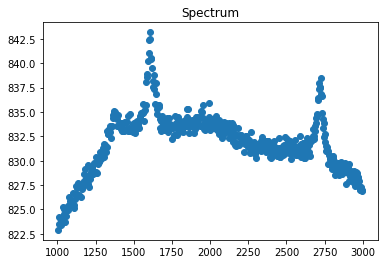

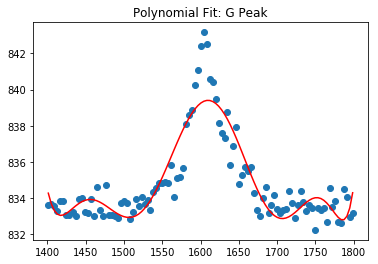

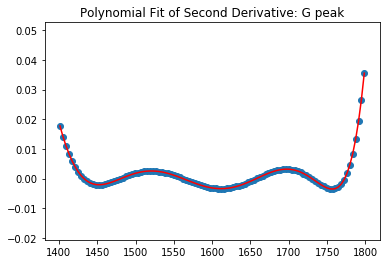

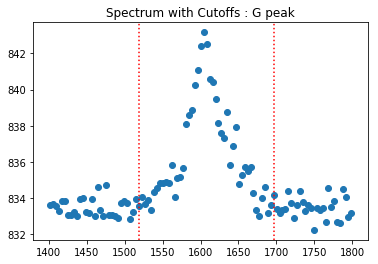

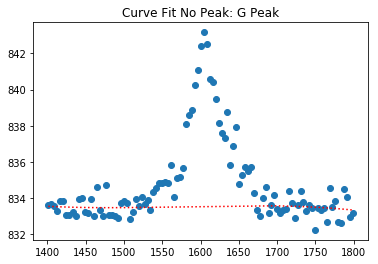

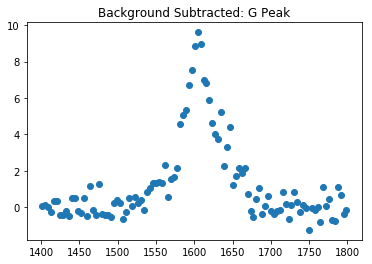

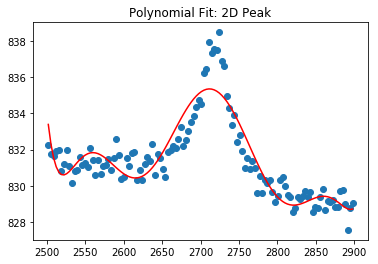

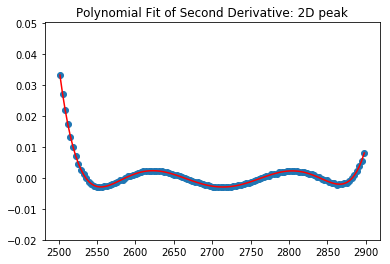

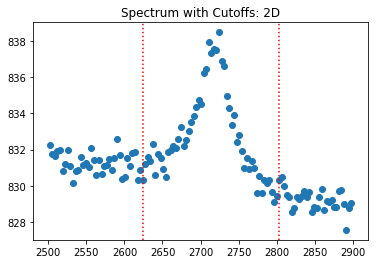

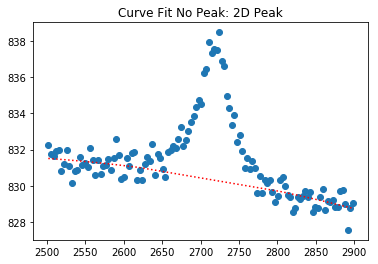

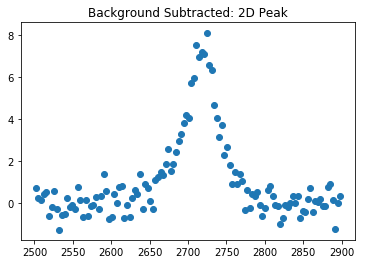

In [415]:
# BACKGROUND SUBTRACTION
# Fits a polynomial over the peak between start_range and end_range. Uses the local maxima of the second 
# derivative of that polynomial to determine the cutoff points for the peak itself. Fits a polynomial to 
# the data that excludes the peak, and subtracts that background polynomial from the spectrum data to 
# give final peak

import warnings
warnings.simplefilter('ignore', np.RankWarning)

# SELECT APPROPRIATE DATA RANGE

# set cutoffs for each peak
# range : range over which to fit polynomial
start_G_range = 1400
end_G_range = 1800
start_2D_range = 2500
end_2D_range = 2900
# peak : minimum possible wavenumber for start of peak itself
# use this to eliminate edge effects of derivatives
start_G_peak = 1500
start_2D_peak = 2600


# LOAD SPECTRUM

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (Y-Axis).txt','r')

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (Y-Axis).txt','r')

xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (X-Axis).txt','r')
yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (Y-Axis).txt','r')

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\1 ACS_6-8_layer_Gr_Cu_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\1 ACS_6-8_layer_Gr_Cu_spec1 (Y-Axis).txt','r')

x = np.loadtxt(xfile)
y = np.loadtxt(yfile)

# convert to numpy arrays
x_np = np.array(x)
y_np = np.array(y)

# select G peak
x_G = x_np[(np.argmax(x_np>start_G_range)):(np.argmax(x_np>end_G_range))]
y_G = y_np[(np.argmax(x_np>start_G_range)):(np.argmax(x_np>end_G_range))]

# select 2D peak
x_2D = x_np[(np.argmax(x_np>start_2D_range)):(np.argmax(x_np>end_2D_range))]
y_2D = y_np[(np.argmax(x_np>start_2D_range)):(np.argmax(x_np>end_2D_range))]



# POLYNOMIAL FIT TO SPECTRUM

# degree of polynomial fit
degree_G = 10
degree_2D = 10

# calculate polynomial
z_G = np.polyfit(x_G, y_G, degree_G)
f_G = np.poly1d(z_G)
z_2D = np.polyfit(x_2D, y_2D, degree_2D)
f_2D = np.poly1d(z_2D)

# calculate y values for polynomial
y_G_poly = f_G(x_G)
y_2D_poly = f_2D(x_2D)


# derivatives
import scipy.misc as sm
derivs2_G = []
for i in x_G:
    derivs2_G.append((sm.derivative(f_G, i, n=2)))
derivs2_2D = [] 
for i in x_2D:
    derivs2_2D.append((sm.derivative(f_2D, i, n=2)))



# FIND LOCAL MAXIMA OF SECOND DERIVATIVE

# fits a polynomial to 2nd derivative, finds maxima of that

# degree of polynomial fit
degree2_G = 10
degree2_2D = 10

# calculate polynomial
z2_G = np.polyfit(x_G, derivs2_G, degree2_G)
f2_G = np.poly1d(z2_G)
z2_2D = np.polyfit(x_2D, derivs2_2D, degree_2D)
f2_2D = np.poly1d(z2_2D)

# calculate y values for polynomial
y2_G = f2_G(x_G)
y2_2D = f2_2D(x_2D)

# find local maxima 
from scipy.signal import argrelextrema

# use start_peak to eliminate edge effects
idx_G = np.argmax(x_G>start_G_peak)
x_Gpeak = x_G[idx_G:]
derivs2a_G = np.array(y2_G[idx_G:])

idx_2D = np.argmax(x_2D>start_2D_peak)
x_2Dpeak = x_2D[idx_2D:]
derivs2a_2D = np.array(y2_2D[idx_2D:])

# this is indexed from the start of x_G, x_2D
maxs_G = argrelextrema(derivs2a_G, np.greater)
start_idx_G = maxs_G[0][0] + idx_G
end_idx_G = maxs_G[0][1] + idx_G
start_G = x_G[start_idx_G]
end_G = x_G[end_idx_G]

maxs_2D = argrelextrema(derivs2a_2D, np.greater)
start_idx_2D = maxs_2D[0][0] + idx_2D
end_idx_2D = maxs_2D[0][1] + idx_2D
start_2D = x_2D[start_idx_2D]
end_2D = x_2D[end_idx_2D]




# FIT CURVE TO BACKGROUND 

# exclude peak
x_G_no_peak = np.concatenate((x_G[:start_idx_G], x_G[end_idx_G:]))
y_G_no_peak = np.concatenate((y_G[:start_idx_G], y_G[end_idx_G:]))

x_2D_no_peak = np.concatenate((x_2D[:start_idx_2D], x_2D[end_idx_2D:]))
y_2D_no_peak = np.concatenate((y_2D[:start_idx_2D], y_2D[end_idx_2D:]))

# degree of polynomial fit to background
degree3_G = 3
degree3_2D = 3

# calculate polynomial
z3_G = np.polyfit(x_G_no_peak, y_G_no_peak, degree3_G)
f3_G = np.poly1d(z3_G)

z3_2D = np.polyfit(x_2D_no_peak, y_2D_no_peak, degree3_2D)
f3_2D = np.poly1d(z3_2D)

# calculate y values of polynomial 
y3_G = f3_G(x_G_no_peak)
y3_2D = f3_2D(x_2D_no_peak)



# SUBTRACT OUT BACKGROUND
y_G_fixed = y_G - f3_G(x_G)
y_2D_fixed = y_2D - f3_2D(x_2D)




# PLOTS 

plt.figure(0)
py.title('Spectrum')
spec_start = np.argmax(x_np>1000)
spec_end = np.argmax(x_np>3000)
py.scatter(x[spec_start:spec_end],y[spec_start:spec_end])

plt.figure(1)
py.title('Polynomial Fit: G Peak')
py.scatter(x_G,y_G)
py.plot(x_G,y_G_poly,'-r')
py.show()

plt.figure(2)
py.title('Polynomial Fit of Second Derivative: G peak')
py.scatter(x_G,derivs2_G)
py.plot(x_G, y2_G,'-r')
py.show()

plt.figure(3)
py.title('Spectrum with Cutoffs : G peak')
plt.axvline(x=start_G, linestyle=':', color='r')
plt.axvline(x=end_G, linestyle=':', color='r')
py.scatter(x_G,y_G)

plt.figure(4)
py.title('Curve Fit No Peak: G Peak')
py.scatter(x_G, y_G)
py.plot(x_G_no_peak, y3_G, linestyle=':', color='r')
py.show()

plt.figure(5)
py.title('Background Subtracted: G Peak')
py.scatter(x_G, y_G_fixed)

plt.figure(6)
py.title('Polynomial Fit: 2D Peak')
py.scatter(x_2D,y_2D)
py.plot(x_2D,y_2D_poly,'-r')
py.show()

plt.figure(7)
py.title('Polynomial Fit of Second Derivative: 2D peak')
py.scatter(x_2D,derivs2_2D)
py.plot(x_2D, y2_2D,'-r')
py.show()

plt.figure(8)
py.title('Spectrum with Cutoffs: 2D')
plt.axvline(x=start_2D, linestyle=':', color='r')
plt.axvline(x=end_2D, linestyle=':', color='r')
py.scatter(x_2D,y_2D)

plt.figure(9)
py.title('Curve Fit No Peak: 2D Peak')
py.scatter(x_2D, y_2D)
py.plot(x_2D_no_peak, y3_2D, linestyle=':', color='r')
py.show()

plt.figure(10)
py.title('Background Subtracted: 2D Peak')
py.scatter(x_2D, y_2D_fixed)




G Parameters : [ 1.60591496e+03  4.57556822e+01  6.47545119e+02 -2.42333265e-01]


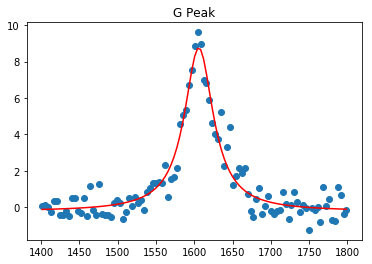

2D Parameters : [ 2.71774390e+03  4.51388092e+01  5.59811061e+02 -2.50782526e-01]


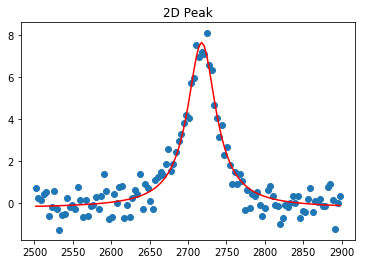

In [416]:
# Lorenztian curve fit to peaks 
# must first do background subtraction


from scipy.optimize import curve_fit
from math import pi

xdata_G = x_G
ydata_G = y_G_fixed
xdata_2D = x_2D
ydata_2D = y_2D_fixed

# initial parameters (guess - doesn't really matter)
init_center_G = 1600
init_width_G = 10
init_amplitude_factor_G = 300
init_vertical_shift_G = 0

init_center_2D = 2700
init_width_2D = 10
init_amplitude_factor_2D = 300
init_vertical_shift_2D = 0

init_params_G = [init_center_G, init_width_G, init_amplitude_factor_G, init_vertical_shift_G]
init_params_2D = [init_center_2D, init_width_2D, init_amplitude_factor_2D, init_vertical_shift_2D]

def lorentz(x, center, width, A, C):
    return ( A * (0.5 * width) / (pi * ( ((x - center) ** 2) + ((0.5 * width) ** 2) ) ) + C)

params_G, cov_G = curve_fit(lorentz, xdata_G, ydata_G, p0=init_params_G)
params_2D, cov_2D = curve_fit(lorentz, xdata_2D, ydata_2D, p0=init_params_2D)

print('G Parameters : ' + str(params_G))

plt.figure(0)
py.title('G Peak')
py.scatter(xdata_G, ydata_G)
py.plot(xdata, lorentz(xdata_G, *params_G), color='r')
py.show()

print('2D Parameters : ' + str(params_2D))

plt.figure(1)
py.title('2D Peak')
py.scatter(xdata_2D, ydata_2D)
py.plot(xdata_2D, lorentz(xdata_2D, *params_2D), color='r')
py.show()



